# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Reading data from csv

In [3]:
data = pd.read_csv('dataset.csv', encoding='latin-1')
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
data.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [5]:
data.shape

(11055, 32)

In [6]:
data.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


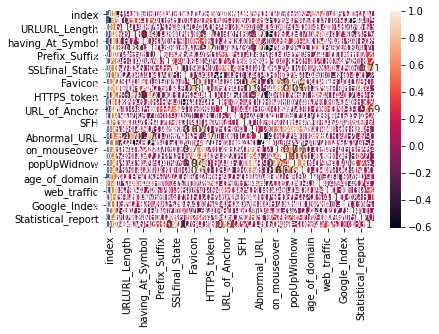

In [7]:
a=len(data[data.Result==0])
b=len(data[data.Result==-1])
c=len(data[data.Result==1])
sns.countplot(data['Result'])
sns.heatmap(data.corr(),annot=True)
data.info()
data.describe()

0 times 0 repeated in Result
4898 times -1 repeated in Result
6157 times 1 repeated in Result


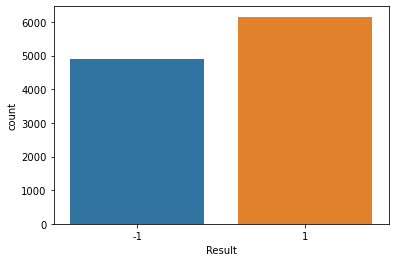

In [8]:
print(a,"times 0 repeated in Result")
print(b,"times -1 repeated in Result")
print(c,"times 1 repeated in Result")
sns.countplot(data['Result'])

In [9]:
X= data.drop(columns='Result')
X.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,5,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [10]:
Y=data['Result']
Y=pd.DataFrame(Y)
Y.head()

,Result
0,-1
1,-1
2,-1
3,-1
4,1


In [11]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2,random_state=2)

In [12]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(8844, 31)
(2211, 31)
(8844, 1)
(2211, 1)


# Logistic Regression and check its accuracy

In [13]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

logreg_predict= model_1.predict(test_X)
LogReg_Accuracy=accuracy_score(logreg_predict,test_Y)
LogReg_Accuracy

c:\users\gaura\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\gaura\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9208502939846224

In [14]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.91      0.91      0.91       984
           1       0.93      0.93      0.93      1227

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



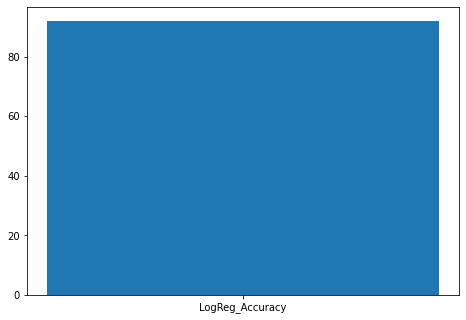

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algorithms = ['LogReg_Accuracy']
result = [LogReg_Accuracy*100]
ax.bar(algorithms,result)
plt.show()

# K-Nearest Neighbors Classifier 

In [17]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

knn_predict=model_2.predict(test_X)

Knn_Accuracy=accuracy_score(knn_predict,test_Y)
Knn_Accuracy

<ipython-input-17-fcb7e54d11ba>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_2= knn.fit(train_X,train_Y)


0.6440524649479873

In [18]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.60      0.60      0.60       987
           1       0.68      0.68      0.68      1224

    accuracy                           0.64      2211
   macro avg       0.64      0.64      0.64      2211
weighted avg       0.64      0.64      0.64      2211



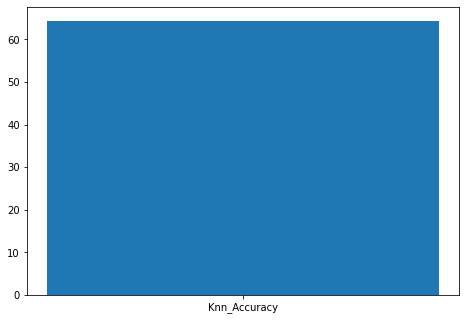

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algorithms = ['Knn_Accuracy']
result = [Knn_Accuracy*100]
ax.bar(algorithms,result)
plt.show()

# Decision-tree classifier 

In [23]:
tree = DecisionTreeClassifier(criterion='entropy') 
model_3= tree.fit(train_X,train_Y)

tree_predict= model_3.predict(test_X)

Decision_tree_Accuracy=accuracy_score(tree_predict,test_Y)
Decision_tree_Accuracy


0.9565807327001357

In [24]:
print(classification_report(test_Y,tree_predict))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       987
           1       0.96      0.96      0.96      1224

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



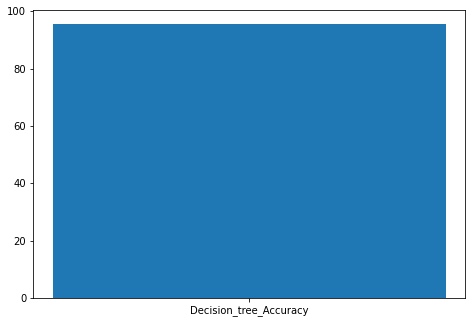

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algorithms = ['Decision_tree_Accuracy']
result = [Decision_tree_Accuracy*100]
ax.bar(algorithms,result)
plt.show()

<ipython-input-27-3c7b77552559>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


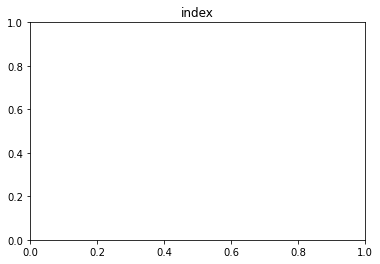

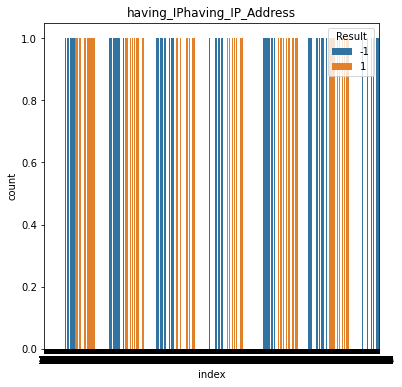

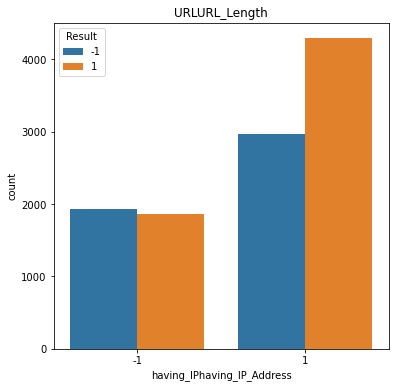

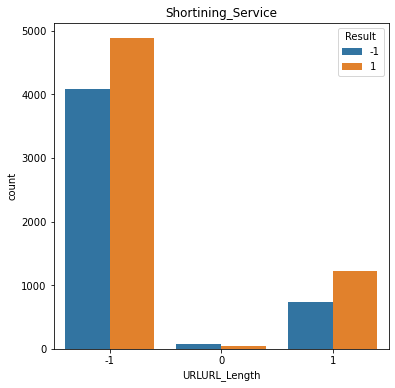

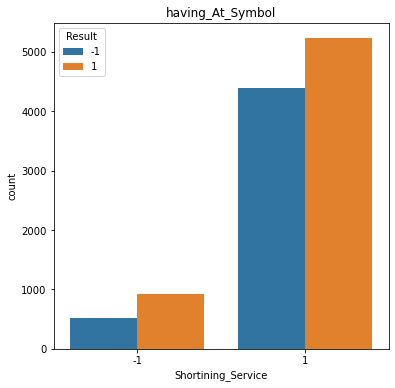

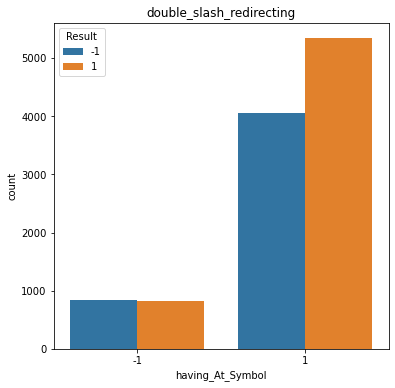

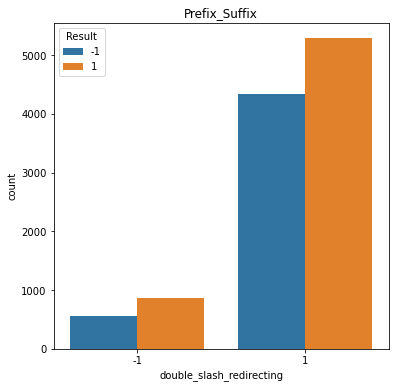

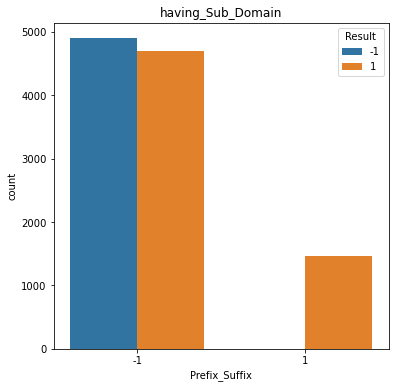

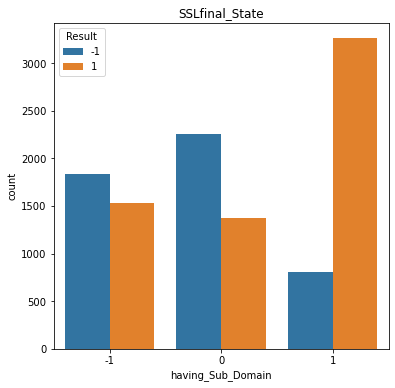

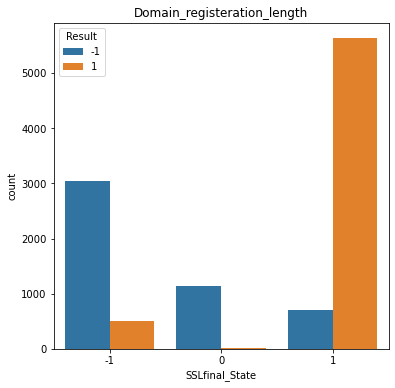

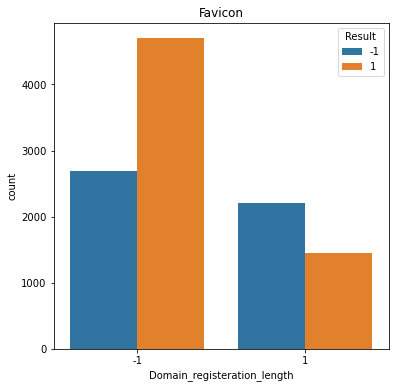

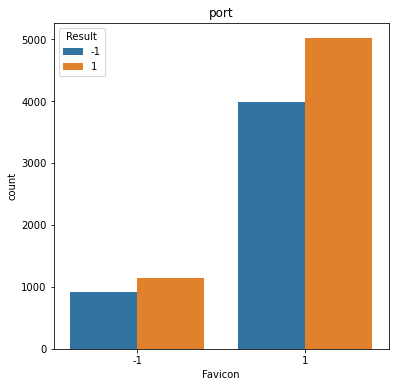

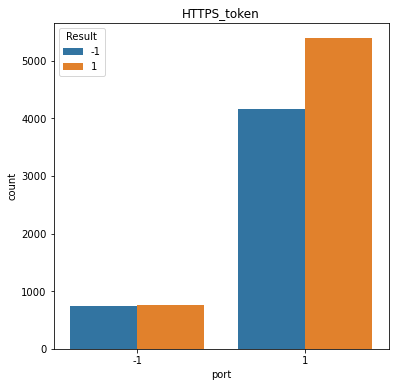

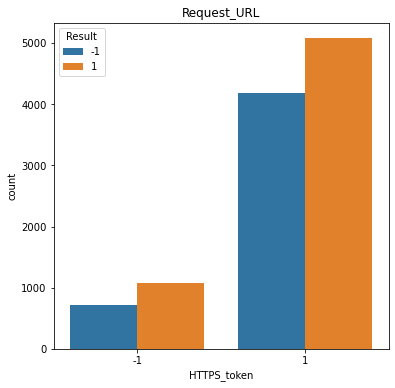

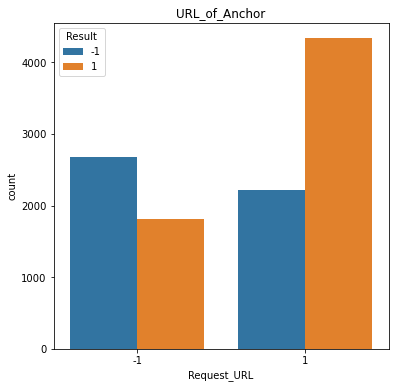

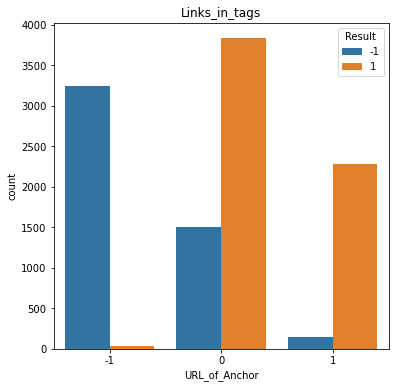

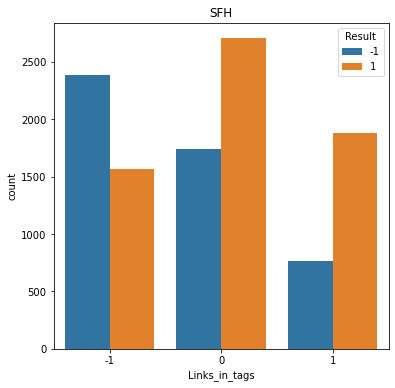

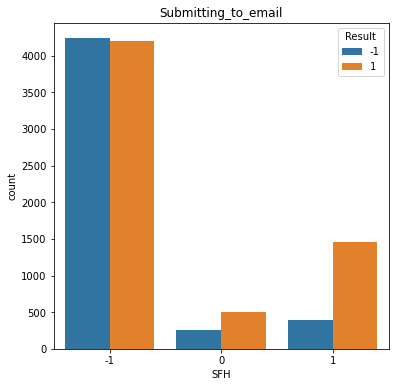

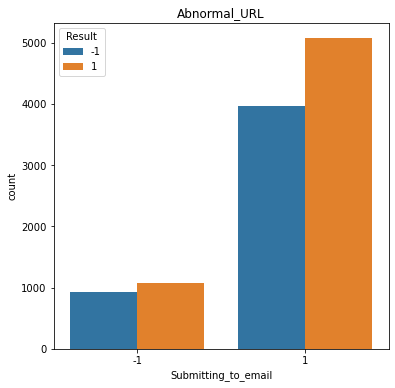

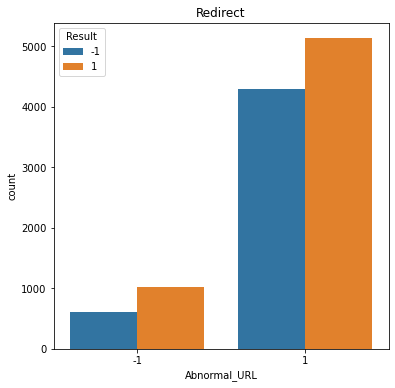

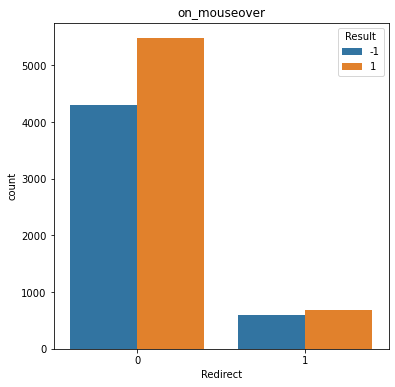

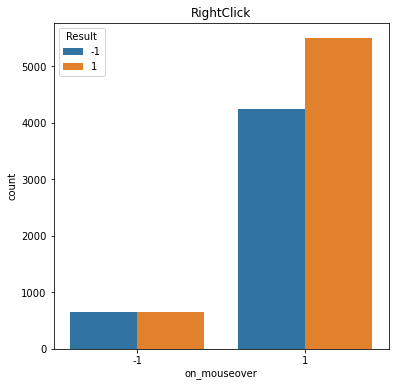

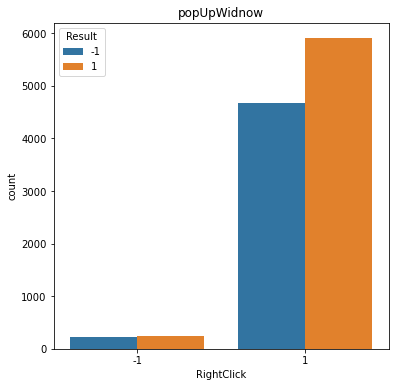

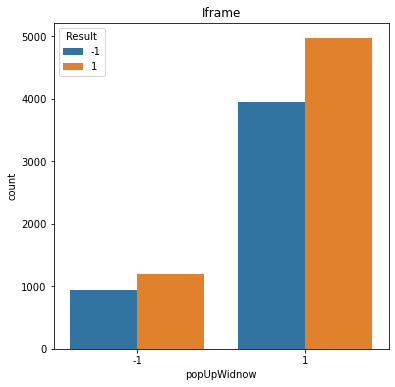

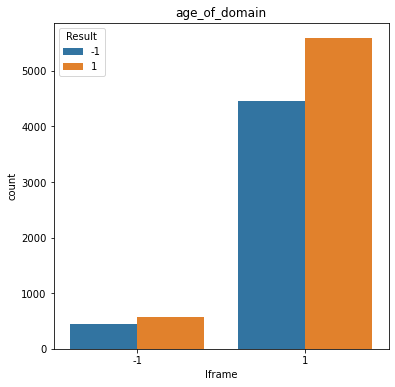

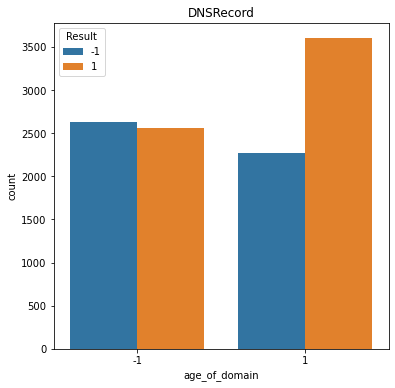

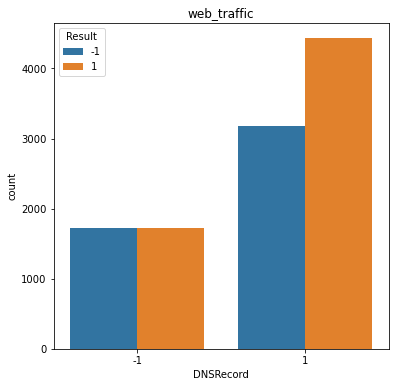

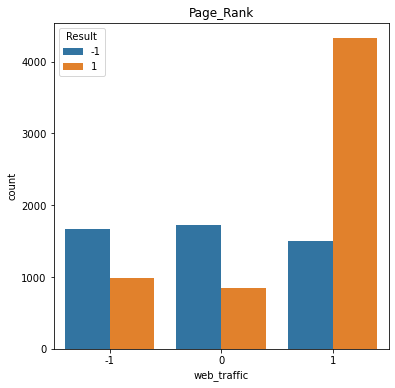

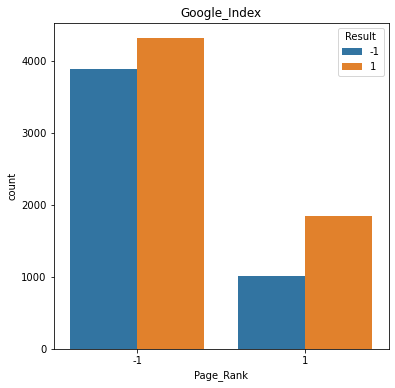

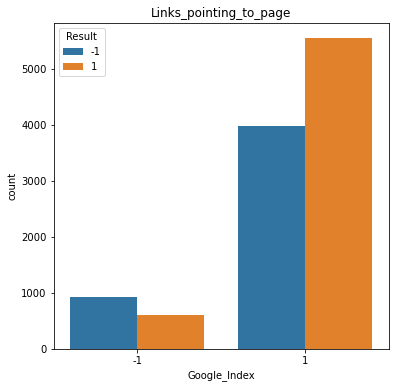

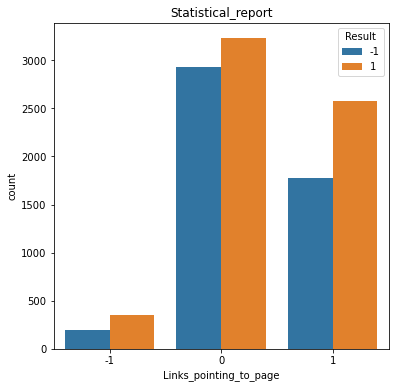

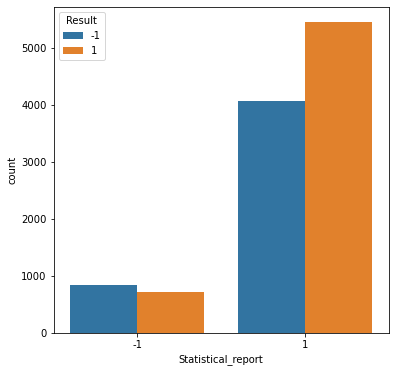

In [27]:
result = data["Result"]
features = data.drop(['Result'], axis = 1) 

for i in features.columns:
    plt.title("%s"%i)
    plt.figure(figsize=(6,6))
    sns.countplot(data[i],hue=data['Result'])

# Output of three algorithm 

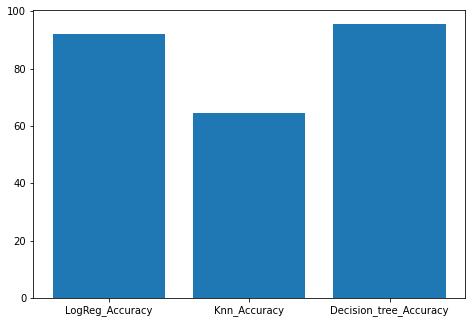

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algorithms = ['LogReg_Accuracy', 'Knn_Accuracy', 'Decision_tree_Accuracy']
result = [LogReg_Accuracy*100,Knn_Accuracy*100,Decision_tree_Accuracy*100]
ax.bar(algorithms,result)
plt.show()